# Lista 2 

## Universidad del valle de Guatemala
### Vision por computadora

In [3]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


### Filtro de Convelved2d

In [9]:
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel
    output = np.zeros_like(image)  # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + kernel.shape[0] - 1, image.shape[1] + kernel.shape[1] - 1))   
    image_padded[kernel.shape[0]//2:-kernel.shape[0]//2 + 1, kernel.shape[1]//2:-kernel.shape[1]//2 + 1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+kernel.shape[0],x:x+kernel.shape[1]]).sum()        
    return output

### Harris Detector

In [8]:
def harris_corner_detector(image, threshold=0.01):
    # Convertir la imagen a escala de grises
    gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

    # Filtros de Sobel para calcular las derivadas
    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Convolución de la imagen con los filtros de Sobel
    Ix = convolve2d(gray, sobelx)
    Iy = convolve2d(gray, sobely)

    # Productos de las derivadas
    Ixx = Ix * Ix
    Ixy = Ix * Iy
    Iyy = Iy * Iy

    # Aplicar una función de ventana Gaussiana para suavizar los productos de las derivadas
    kernel_size = 5
    sigma = 1.5
    gauss = np.outer(np.exp(-(np.arange(-kernel_size//2, kernel_size//2+1)**2)/(2*sigma**2)), 
                     np.exp(-(np.arange(-kernel_size//2, kernel_size//2+1)**2)/(2*sigma**2)))
    Ixx = convolve2d(Ixx, gauss)
    Ixy = convolve2d(Ixy, gauss)
    Iyy = convolve2d(Iyy, gauss)

    # Calcular el determinante y la traza de la matriz de covarianza en cada punto
    det = Ixx * Iyy - Ixy ** 2
    trace = Ixx + Iyy

    # Calcular la respuesta de Harris para cada punto
    harris_response = det - 0.04 * trace ** 2

    # Obtener los puntos de esquina (supresión de no máximos)
    corner_points = np.zeros_like(harris_response)
    corner_points[harris_response > threshold * harris_response.max()] = 255

    return corner_points

### Ejemplo 1

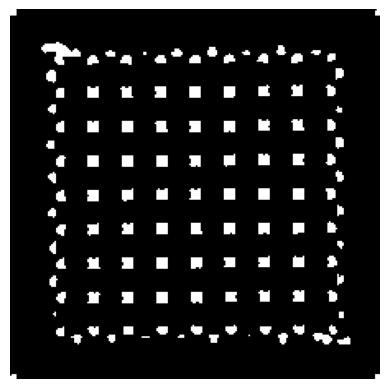

In [5]:
# Cargar la imagen
image = np.array(Image.open('./Imagenes/ajedrez.jpeg'))

# Llamar a la función del detector de esquinas de Harris
corner_points = harris_corner_detector(image)

# Mostrar las esquinas detectadas
plt.imshow(corner_points, cmap='gray')
plt.axis('off')
plt.show()


### Ejemplo 2


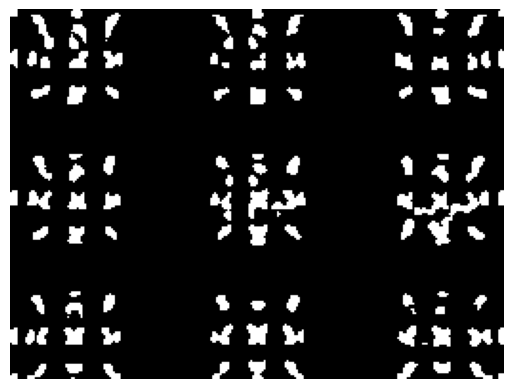

In [6]:
# Cargar la imagen
image2 = np.array(Image.open('./Imagenes/ventanas.jpeg'))

# Llamar a la función del detector de esquinas de Harris
corner_points2 = harris_corner_detector(image2)

# Mostrar las esquinas detectadas
plt.imshow(corner_points2, cmap='gray')
plt.axis('off')
plt.show()
